## 데이터 분석 실습 (noom)

In [1]:
import pandas as pd
import numpy as np

### 데이터 불러오기

In [2]:
raw_data = pd.read_csv("data/noom/noom_user.csv", parse_dates=["Purchased At"])

# 컬럼명 불러오기
print(raw_data.columns)

print(raw_data.shape)

raw_data.head()

Index(['Access Code', 'Name', 'Gender', 'Age', 'Height', 'Initial Weight',
       'Lowest Weight', 'Target Weight', 'Product Name', 'Status', 'Price',
       'Purchased At', 'Payment Type', 'Channel'],
      dtype='object')
(10000, 14)


,Access Code,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Product Name,Status,Price,Purchased At,Payment Type,Channel
0,Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,눔 체중감량 프로그램,completed,112500,2017-04-14 19:03:29.976,Recurring,others
1,3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,눔 체중감량 프로그램,completed,44780,2017-05-23 20:53:54.368,Recurring,others
2,6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,눔 체중감량 프로그램 (천원 체험),completed,132000,2017-08-23 23:39:21.840,Recurring,facebook
3,EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,눔 체중감량 프로그램 (천원 체험),completed,112500,2017-08-28 20:18:22.824,Recurring,naver
4,1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,눔 체중감량 프로그램,completed,44780,2017-05-07 17:50:30.944,Recurring,facebook


### 데이터 정리하기

#### 1. 전체 컬럼에서 필요한 컬럼만 가져오기

In [3]:
columns = ["Access Code", "Name", "Gender", "Age", "Height",
           "Initial Weight", "Lowest Weight", "Target Weight", "Status", 
           "Price", "Purchased At", "Channel"]

# 원본 훼손 방지를 위해서 필요한 부분만 가져오기
data = raw_data[columns].copy()

# Access Code 를 index 로 지정
data = data.set_index("Access Code")

print(data.shape)
data.head()

(10000, 11)


,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel
Access Code,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook


In [4]:
# 원본 데이터 확인
raw_data.columns[2:10]

Index(['Gender', 'Age', 'Height', 'Initial Weight', 'Lowest Weight',
       'Target Weight', 'Product Name', 'Status'],
      dtype='object')

In [5]:
# 변형한 데이터 확인
data.columns[2:10]

Index(['Age', 'Height', 'Initial Weight', 'Lowest Weight', 'Target Weight',
       'Status', 'Price', 'Purchased At'],
      dtype='object')

#### 2. 성별 컬럼 정리

In [6]:
# 성별 컬럼에 어떤 겂이 있는지 확인
data["Gender"].unique()

array(['FEMALE', 'MALE', nan], dtype=object)

In [7]:
# 가독성을 높이기 위하여 대문자를 소문자로 변환
data["Gender(clean)"] = data["Gender"].replace("FEMALE", "female")\
                        .replace("MALE", "male")

print(data.shape)
data[["Name", "Gender", "Gender(clean)"]].head()

(10000, 12)


,Name,Gender,Gender(clean)
Access Code,,,
Y9RY2VSI,김승혜,FEMALE,female
3GTN3S3B,허승준,MALE,male
6B0IG276,이지민,FEMALE,female
EMGRU2MO,장설윤,FEMALE,female
1ELG96TX,서성빈,FEMALE,female


In [8]:
# 성별 갯수 확인
data["Gender(clean)"].value_counts()

female    8846
male      1023
Name: Gender(clean), dtype: int64

#### 3. 키 컬럼 정리

In [10]:
# Height 컬럼에서 가장 작은값
data["Height"].min()

-1.0

In [11]:
# Height 컬럼에서 가장 큰값
data["Height"].max()

203.2

In [12]:
# Height 컬럼의 평균값
data["Height"].mean()

163.19149457898467

In [13]:
# 원본을 훼손하지 않기 위해 컬럼의 값을 복사해서 새로운 컬럼 생성
data["Height(clean)"] = data["Height"]

data[["Height(clean)", "Height"]].head()

,Height(clean),Height
Access Code,,
Y9RY2VSI,172.0,172.0
3GTN3S3B,176.0,176.0
6B0IG276,171.0,171.0
EMGRU2MO,160.0,160.0
1ELG96TX,165.0,165.0


In [14]:
# 키가 -1은 있을 수 없으므로 -1 값을 NaN 값으로 수정
data.loc[data["Height(clean)"] < 0, "Height(clean)"] = np.nan

data.loc[data["Height"] < 0, ["Name", "Height", "Height(clean)"]].head()

,Name,Height,Height(clean)
Access Code,,,
O4OWMJG7,오세윤,-1.0,NaN
H6EV5AXL,박슬지,-1.0,NaN
O1IAZS7A,고솔윤,-1.0,NaN
5NEQOWHW,손초영,-1.0,NaN
OFAXUNXD,백채우,-1.0,NaN


In [15]:
# 피봇테이블로 정리
pd.pivot_table(data, index="Gender(clean)", values="Height(clean)")

,Height(clean)
Gender(clean),
female,162.116913
male,175.831965


#### 4. 나이 컬럼 정리

In [16]:
# Age 컬럼에서 가장 작은값
data["Age"].min()

0.0

In [17]:
# Age 컬럼에서 가장 큰값
data["Age"].max()

173.0

In [18]:
# Age 컬럼에의 평균값
data["Age"].mean()

27.463572803728848

In [19]:
# 원본을 훼손하지 않기 위해 컬럼의 값을 복사해서 새로운 컬럼 생성
data["Age(clean)"] = data["Age"]

print(data.shape)
data[["Age", "Age(clean)"]].head()

(10000, 14)


,Age,Age(clean)
Access Code,,
Y9RY2VSI,25.0,25.0
3GTN3S3B,26.0,26.0
6B0IG276,23.0,23.0
EMGRU2MO,20.0,20.0
1ELG96TX,28.0,28.0


In [20]:
# 나이가 0인 데이터는 NaN으로 변경
# 나이가 60세 이상인 데이터는 NaN으로 변경

data.loc[data["Age(clean)"] == 0, "Age(clean)"] = np.nan
data.loc[data["Age(clean)"] >= 60, "Age(clean)"] = np.nan

print(data.shape)

# 나이가 0세이거나 60세 이상인 데이터를 찾아서 표시
data.loc[(data["Age"]== 0) | (data["Age"] >= 60), 
         ["Name", "Age", "Age(clean)"]].head()

(10000, 14)


,Name,Age,Age(clean)
Access Code,,,
9PTGVW4B,강서연,0.0,NaN
ACV6D35S,윤우성,0.0,NaN
Y0OK1FWA,김서영,85.0,NaN
WX34HGBL,강채민,0.0,NaN
R9XCS81F,최유신,0.0,NaN


In [22]:
# 피벗테이블을 이용하여 남녀 나이의 평균 표시
pd.pivot_table(data, index="Gender(clean)", values="Age(clean)")

,Age(clean)
Gender(clean),
female,27.172929
male,29.309127


### VIP 구하기

#### 5. 전체 컬럼에서 필요한 컬럼만 사용

In [23]:
# 필요한 컬럼을 vip_colums 라는 변수에 담고, 원본 훼손을 방지하기위해 따로 테이블을 만듬
vip_columns = ["Name", "Age(clean)", "Height(clean)",
           "Initial Weight", "Lowest Weight", "Target Weight", "Status"]

vip_data = data[vip_columns].copy()

print(vip_data.shape)
vip_data.head()

(10000, 7)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status
Access Code,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed


#### 6. 주어진 컬럼으로 다음의 추가 정보를 계산

  1. ```Weight Loss(goal)``` - 목표 감량치. ```Initial Weight``` 컬럼과 ```Target Weight```의 차이를 나타냄
  2. ```Weight Loss(current)``` - 최대 감량치. ```Initial Weight``` 컬럼과 ```Lowest Weight```의 차이를 나타냄.
  3. 체질량지수(```BMI```) - 키(```Height(clean)```)와 체중(```Initial Weight```)으로 체지방의 양을 추정하는 공식이며 구체적인 공식은 다음과 같음

$$
BMI = \frac{체중(kg)}{키(m) \times 키(m)}
$$

In [24]:
# cm 를 m 단위로 바꿔줌
vip_data["Height(clean)_m"] = vip_data["Height(clean)"] * 0.01

vip_data["Height(clean)_m"].head()

Access Code
Y9RY2VSI    1.72
3GTN3S3B    1.76
6B0IG276    1.71
EMGRU2MO    1.60
1ELG96TX    1.65
Name: Height(clean)_m, dtype: float64

In [25]:
# Weight Loss(goal) - 목표 감량치. Initial Weight 컬럼과 Target Weight의 차이를 나타냄

vip_data["Weight Loss(goal)"] = vip_data["Initial Weight"] - vip_data["Target Weight"]

vip_data["Weight Loss(goal)"].head()

Access Code
Y9RY2VSI    11.900000
3GTN3S3B     5.000000
6B0IG276     6.860000
EMGRU2MO    17.700000
1ELG96TX     3.884998
Name: Weight Loss(goal), dtype: float64

In [26]:
# Weight Loss(current) - 최대 감량치. Initial Weight 컬럼과 Lowest Weight의 차이를 나타냄

vip_data["Weight Loss(current)"] = vip_data["Initial Weight"] - vip_data["Lowest Weight"]

vip_data["Weight Loss(current)"].head()

Access Code
Y9RY2VSI    1.1
3GTN3S3B    NaN
6B0IG276    NaN
EMGRU2MO    NaN
1ELG96TX    NaN
Name: Weight Loss(current), dtype: float64

In [27]:
# 체질량지수(BMI) - 키(Height(clean))와 체중(Initial Weight)으로 체지방의 양을 추정하는 공식

vip_data["BMI"] = vip_data["Initial Weight"] / vip_data["Height(clean)_m"] ** 2

print(vip_data.shape)

# 새로 만든 컬럼 표시
vip_data[["Name", "Weight Loss(goal)", "Weight Loss(current)", "BMI"]].head()

(10000, 11)


,Name,Weight Loss(goal),Weight Loss(current),BMI
Access Code,,,,
Y9RY2VSI,김승혜,11.900000,1.1,22.613575
3GTN3S3B,허승준,5.000000,NaN,22.598140
6B0IG276,이지민,6.860000,NaN,33.514586
EMGRU2MO,장설윤,17.700000,NaN,27.617187
1ELG96TX,서성빈,3.884998,NaN,20.385675


#### 7. 잘못된 정보를 기입한 사용자(invalid user)를 찾기*

<table border="1" class="dataframe" style="float: left">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>Name</th>
         <th>Age(clean)</th>
         <th>Height(clean)</th>
         <th>Initial Weight</th>
         <th>Lowest Weight</th>
         <th>Target Weight</th>
         <th>Status</th>
         <th>Weight Loss(goal)</th>
         <th>Weight Loss(current)</th>
         <th>BMI</th>
         <th>Invalid</th>
      </tr>
      <tr>
         <th>Access Code</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>3GTN3S3B</th>
         <td>허승준</td>
         <td>26.0</td>
         <td>176.0</td>
         <td>70.0</td>
         <td>NaN</td>
         <td>65.000000</td>
         <td>completed</td>
         <td>5.000000</td>
         <td>NaN</td>
         <td>22.598140</td>
         <td>True</td>
      </tr>
      <tr>
         <th>6B0IG276</th>
         <td>이지민</td>
         <td>23.0</td>
         <td>171.0</td>
         <td>98.0</td>
         <td>NaN</td>
         <td>91.140000</td>
         <td>completed</td>
         <td>6.860000</td>
         <td>NaN</td>
         <td>33.514586</td>
         <td>True</td>
      </tr>
      <tr>
         <th>EMGRU2MO</th>
         <td>장설윤</td>
         <td>20.0</td>
         <td>160.0</td>
         <td>70.7</td>
         <td>NaN</td>
         <td>53.000000</td>
         <td>completed</td>
         <td>17.700000</td>
         <td>NaN</td>
         <td>27.617187</td>
         <td>True</td>
      </tr>
      <tr>
         <th>1ELG96TX</th>
         <td>서성빈</td>
         <td>28.0</td>
         <td>165.0</td>
         <td>55.5</td>
         <td>NaN</td>
         <td>51.615002</td>
         <td>completed</td>
         <td>3.884998</td>
         <td>NaN</td>
         <td>20.385675</td>
         <td>True</td>
      </tr>
      <tr>
         <th>U9AELHAT</th>
         <td>배소정</td>
         <td>22.0</td>
         <td>161.0</td>
         <td>76.0</td>
         <td>NaN</td>
         <td>48.000000</td>
         <td>completed</td>
         <td>28.000000</td>
         <td>NaN</td>
         <td>29.319856</td>
         <td>True</td>
      </tr>
   </tbody>
</table>

In [28]:
vip_data["Status"].unique()

array(['completed', 'cancelled', 'refunded'], dtype=object)

In [31]:
def invalid(invalid):
    Status = invalid["Status"]
    Age = invalid["Age(clean)"]
    Height = invalid["Height(clean)"]
    IWeight = invalid["Initial Weight"]
    LWeight = invalid["Lowest Weight"]
    TWeight = invalid["Target Weight"]
    BMI = invalid["BMI"]
    WLoss = invalid["Weight Loss(goal)"]
    # Status가 completed 가 아니면 False
    if Status != "completed":
        return False
    # Age 나 Height 에 NaN 값이 있으면 True
    if pd.isnull(Age) or pd.isnull(Height):
        return True
    # IWeight 나 LWeight 나 TWeight 에 NaN 값이 있으면 True
    if pd.isnull(IWeight) or pd.isnull(LWeight) or pd.isnull(TWeight):
        return True
    # Height 가 140 미만이거나 200 초과면 True
    if Height < 140 or Height > 200:
        return True
    # BMI 가 18.5 미만 30 초과면 True
    if BMI < 18.5 or BMI > 30:
        return True
    # WLoss 가 0 미만이면 True
    if WLoss < 0:
        return True
    return False

In [32]:
vip_data["Invalid"] = vip_data.apply(invalid, axis = 1)

vip_data.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(clean)_m,Weight Loss(goal),Weight Loss(current),BMI,Invalid
Access Code,,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,1.72,11.900000,1.1,22.613575,False
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,1.76,5.000000,NaN,22.598140,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,1.71,6.860000,NaN,33.514586,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,1.60,17.700000,NaN,27.617187,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,1.65,3.884998,NaN,20.385675,True


In [34]:
# Invalid 의 값이 True 인 사용자만 표시
invalid_user = vip_data[vip_data["Invalid"]]

print(invalid_user.shape)
invalid_user.head()

(2619, 12)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(clean)_m,Weight Loss(goal),Weight Loss(current),BMI,Invalid
Access Code,,,,,,,,,,,,
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,1.76,5.000000,NaN,22.598140,True
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,1.71,6.860000,NaN,33.514586,True
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,1.60,17.700000,NaN,27.617187,True
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,1.65,3.884998,NaN,20.385675,True
U9AELHAT,배소정,22.0,161.0,76.0,NaN,48.000000,completed,1.61,28.000000,NaN,29.319856,True


#### 8. VIP 사용자 체크

In [36]:
def is_vip(vip):
    Status = vip["Status"]
    BMI = vip["BMI"]
    WLossg = vip["Weight Loss(goal)"]
    WLossc = vip["Weight Loss(current)"]
    
    # WLossc 나 WLossg 중 하나라도 NaN값이 들어가 있을 경우 False
    if pd.isnull(WLossc) or pd.isnull(WLossg):
        return False
    # BMI 에 NaN값이 들어가 있을 경우 False
    if pd.isnull(BMI):
        return False
    # Status 가 completed 가 아니면 False
    if Status != "completed":
        return False
    # WLossc 가 10 이하라면 False
    if WLossc < 10:
        return False    
    # BMI 가 30.0 미만이면 False
    if BMI < 30:
        return False
    # WLossg 가 WLossc 보다 이상이면 False
    if WLossg >= WLossc:
        return False
    # 이 모든 조건에 해당되지 않는다면 True
    return True

In [37]:
vip_data["VIP"] = vip_data.apply(is_vip, axis = 1)

vip_data.head()

,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(clean)_m,Weight Loss(goal),Weight Loss(current),BMI,Invalid,VIP
Access Code,,,,,,,,,,,,,
Y9RY2VSI,김승혜,25.0,172.0,66.9,65.8,55.000000,completed,1.72,11.900000,1.1,22.613575,False,False
3GTN3S3B,허승준,26.0,176.0,70.0,NaN,65.000000,completed,1.76,5.000000,NaN,22.598140,True,False
6B0IG276,이지민,23.0,171.0,98.0,NaN,91.140000,completed,1.71,6.860000,NaN,33.514586,True,False
EMGRU2MO,장설윤,20.0,160.0,70.7,NaN,53.000000,completed,1.60,17.700000,NaN,27.617187,True,False
1ELG96TX,서성빈,28.0,165.0,55.5,NaN,51.615002,completed,1.65,3.884998,NaN,20.385675,True,False


In [38]:
# VIP 의 값이 True 인 사용자만 표시
VIP_user = vip_data[vip_data["VIP"]]

print(VIP_user.shape)
VIP_user.head()

(15, 13)


,Name,Age(clean),Height(clean),Initial Weight,Lowest Weight,Target Weight,Status,Height(clean)_m,Weight Loss(goal),Weight Loss(current),BMI,Invalid,VIP
Access Code,,,,,,,,,,,,,
3T1I8I8E,임솔지,23.0,158.0,80.0137,54.5,77.745742,completed,1.58,2.267958,25.5137,32.051634,True,True
PJYKU9OW,홍윤오,31.0,174.0,99.9000,76.6,84.000000,completed,1.74,15.900000,23.3000,32.996433,True,True
0EMTSGLJ,류선정,34.0,167.0,86.0000,73.2,80.050003,completed,1.67,5.949997,12.8000,30.836531,True,True
FBEAIFW0,서서원,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,True,True
8QQV2YDW,홍서율,23.0,170.0,95.0000,75.7,85.000000,completed,1.70,10.000000,19.3000,32.871972,True,True


### 결제 체크

#### 9. 결제 / 캔슬 / 환불의 총 인원 수와 비율

In [39]:
# Status의 종류와 그 누적 갯수
data["Status"].value_counts()

completed    5400
cancelled    4010
refunded      590
Name: Status, dtype: int64

#### 10. 성별과 나이별 결제 / 캔슬 / 환불의 총 인원 수와 비율

1. 17세 이하
2. 18세 이상, 24세 이하
3. 25세 이상, 35세 이하
4. 36세 이상, 44세 이하
5. 45세 이상, 54세 이하
6. 55세 이상

In [41]:
data.loc[data["Age(clean)"] <= 17, "Age(Group)"] = "00 ~ 17"
data.loc[(data["Age(clean)"] >= 18) & (data["Age(clean)"] <= 24), "Age(Group)"] = "18 ~ 24"
data.loc[(data["Age(clean)"] >= 25) & (data["Age(clean)"] <= 35), "Age(Group)"] = "25 ~ 35"
data.loc[(data["Age(clean)"] >= 36) & (data["Age(clean)"] <= 44), "Age(Group)"] = "36 ~ 44"
data.loc[(data["Age(clean)"] >= 45) & (data["Age(clean)"] <= 54), "Age(Group)"] = "45 ~ 54"
data.loc[data["Age(clean)"] >= 55, "Age(Group)"] = "55 ~ 99"

print(data.shape)
data[["Age(Group)", "Age(clean)"]].head()

(10000, 15)


,Age(Group),Age(clean)
Access Code,,
Y9RY2VSI,25 ~ 35,25.0
3GTN3S3B,25 ~ 35,26.0
6B0IG276,18 ~ 24,23.0
EMGRU2MO,18 ~ 24,20.0
1ELG96TX,25 ~ 35,28.0


In [42]:
data.head()

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,Channel,Gender(clean),Height(clean),Age(clean),Age(Group)
Access Code,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,others,female,172.0,25.0,25 ~ 35
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,others,male,176.0,26.0,25 ~ 35
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,facebook,female,171.0,23.0,18 ~ 24
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,naver,female,160.0,20.0,18 ~ 24
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,facebook,female,165.0,28.0,25 ~ 35


In [43]:
# 피벗테이블로 성별, 나이별 결제 / 캔슬 / 환불의 총 인원 수와 비율 표시
table = pd.pivot_table(data, index=["Gender(clean)", "Age(Group)"], columns="Status",
                           values="Gender", aggfunc=len, fill_value=0)

table.head()

Status                    cancelled  completed  refunded
Gender(clean) Age(Group)                                
female        00 ~ 17            25         35         3
              18 ~ 24          1637       1827       149
              25 ~ 35          1664       2288       271
              36 ~ 44           206        421        46
              45 ~ 54            74        160        25

In [45]:
# 총 인원수와 전환율 표시
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]
table["conversion"] = table["completed"] / table["total"]

table

Status                    cancelled  completed  refunded  total  conversion
Gender(clean) Age(Group)                                                   
female        00 ~ 17            25         35         3     63    0.555556
              18 ~ 24          1637       1827       149   3613    0.505674
              25 ~ 35          1664       2288       271   4223    0.541795
              36 ~ 44           206        421        46    673    0.625557
              45 ~ 54            74        160        25    259    0.617761
              55 ~ 99             0          5         0      5    1.000000
male          00 ~ 17             3          1         0      4    0.250000
              18 ~ 24            80        100        11    191    0.523560
              25 ~ 35           235        404        57    696    0.580460
              36 ~ 44            21         72         9    102    0.705882
              45 ~ 54             9         13         3     25    0.520000
              55 ~ 99             0          1         0      1    1.000000

#### 11. 날짜와 요일 / 시간별 결제 / 캔슬 / 환불 비율

  1. 시간별 구매 현황(0시 ~ 23시)
  2. 요일별 구매 현황(월요일 ~ 일요일)
  3. 0시 ~ 23시 사이의 결제/캔슬/환불 비율.
  4. 월요일-일요일 사이의 결제/캔슬/환불 비율.

In [46]:
data["Purchased At"] = pd.to_datetime(data["Purchased At"])

data["Purchased At"].head()

Access Code
Y9RY2VSI   2017-04-14 19:03:29.976
3GTN3S3B   2017-05-23 20:53:54.368
6B0IG276   2017-08-23 23:39:21.840
EMGRU2MO   2017-08-28 20:18:22.824
1ELG96TX   2017-05-07 17:50:30.944
Name: Purchased At, dtype: datetime64[ns]

In [47]:
# 년, 월, 시, 분, 초, 요일로 나눠서 컬럼 생성
data["Purchased At(year)"] = data["Purchased At"].dt.year
data["Purchased At(month)"] = data["Purchased At"].dt.month
data["Purchased At(day)"] = data["Purchased At"].dt.day
data["Purchased At(hour)"] = data["Purchased At"].dt.hour
data["Purchased At(minute)"] = data["Purchased At"].dt.minute
data["Purchased At(second)"] = data["Purchased At"].dt.second
data["Purchased At(weekday)"] = data["Purchased At"].dt.weekday_name
data.head()

,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,...,Height(clean),Age(clean),Age(Group),Purchased At(year),Purchased At(month),Purchased At(day),Purchased At(hour),Purchased At(minute),Purchased At(second),Purchased At(weekday)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,...,172.0,25.0,25 ~ 35,2017,4,14,19,3,29,Friday
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,...,176.0,26.0,25 ~ 35,2017,5,23,20,53,54,Tuesday
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,...,171.0,23.0,18 ~ 24,2017,8,23,23,39,21,Wednesday
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,...,160.0,20.0,18 ~ 24,2017,8,28,20,18,22,Monday
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,...,165.0,28.0,25 ~ 35,2017,5,7,17,50,30,Sunday


In [49]:
# 피벗테이블로 시간별 결제 / 캔슬 / 환불의 총 인원 수와 비율 표시
table = pd.pivot_table(data, index="Purchased At(hour)", columns="Status", values="Name", aggfunc=len, fill_value=0)

table.head()

Status,cancelled,completed,refunded
Purchased At(hour),,,
0,236,344,26
1,156,207,28
2,90,97,4
3,58,66,5
4,59,45,7


In [50]:
# 총 인원수와 전환율 표시
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]
table["conversion"] = table["completed"] / table["total"]

table

Status,cancelled,completed,refunded,total,conversion
Purchased At(hour),,,,,
0,236,344,26,606,0.567657
1,156,207,28,391,0.529412
2,90,97,4,191,0.507853
3,58,66,5,129,0.511628
4,59,45,7,111,0.405405
5,36,47,6,89,0.528090
6,48,70,6,124,0.564516
7,80,114,20,214,0.532710
8,171,264,29,464,0.568966


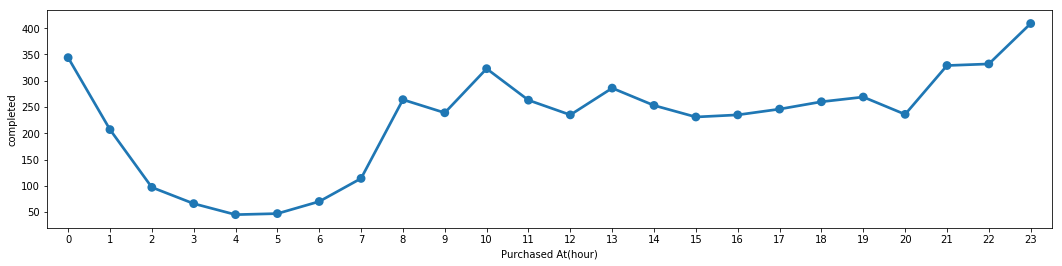

In [51]:
# 시각화
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.pointplot(data=table.reset_index(), x="Purchased At(hour)", y="completed", ax=ax)

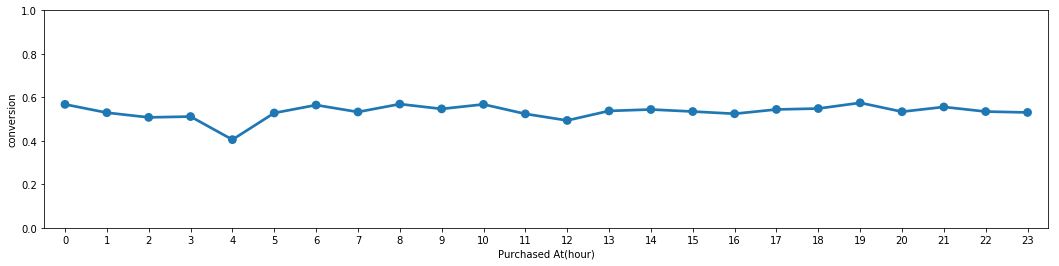

In [52]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

# y축의 최소/최대값을 0/1로 고정합니다.
plt.ylim(0, 1)

sns.pointplot(data=table.reset_index(), x="Purchased At(hour)", y="conversion", ax=ax)

In [53]:
# 요일 정보 표시
data[["Purchased At", "Purchased At(weekday)"]].head()

,Purchased At,Purchased At(weekday)
Access Code,,
Y9RY2VSI,2017-04-14 19:03:29.976,Friday
3GTN3S3B,2017-05-23 20:53:54.368,Tuesday
6B0IG276,2017-08-23 23:39:21.840,Wednesday
EMGRU2MO,2017-08-28 20:18:22.824,Monday
1ELG96TX,2017-05-07 17:50:30.944,Sunday


In [55]:
# 피벗테이블로 요일벌 결제 / 캔슬 / 환불의 총 인원 수와 비율 표시
table = pd.pivot_table(data, index="Purchased At(weekday)", columns="Status", values="Name", aggfunc=len)

table

Status,cancelled,completed,refunded
Purchased At(weekday),,,
Friday,490,674,56
Monday,691,863,93
Saturday,412,537,73
Sunday,428,625,88
Thursday,616,813,88
Tuesday,694,935,102
Wednesday,679,953,90


In [57]:
# 총 인원수와 전환율 표시
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]
table["conversion"] = table["completed"] / table["total"]

In [58]:
# 요일 순서 지정을 위한 리스트 작성
weekday_columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# 이 데이터프레임의 결과를 월요일(Monday)부터 일요일(Sunday)까지 표시
table.loc[weekday_columns]

Status,cancelled,completed,refunded,total,conversion
Purchased At(weekday),,,,,
Monday,691,863,93,1647,0.523983
Tuesday,694,935,102,1731,0.540150
Wednesday,679,953,90,1722,0.553426
Thursday,616,813,88,1517,0.535926
Friday,490,674,56,1220,0.552459
Saturday,412,537,73,1022,0.525440
Sunday,428,625,88,1141,0.547765


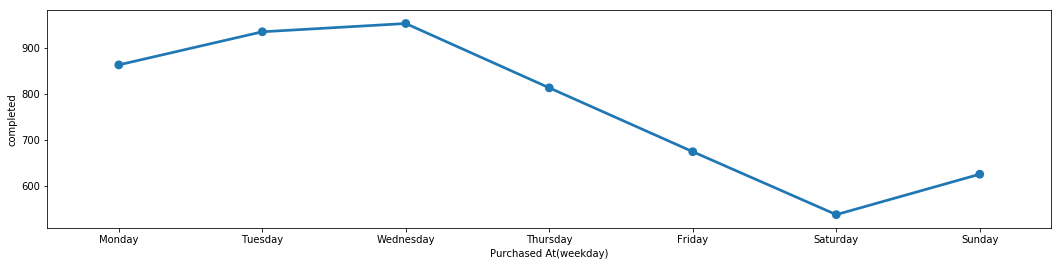

In [59]:
# 시각화 
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=table.reset_index(), x="Purchased At(weekday)", y="completed", order=weekday_columns, ax=ax)

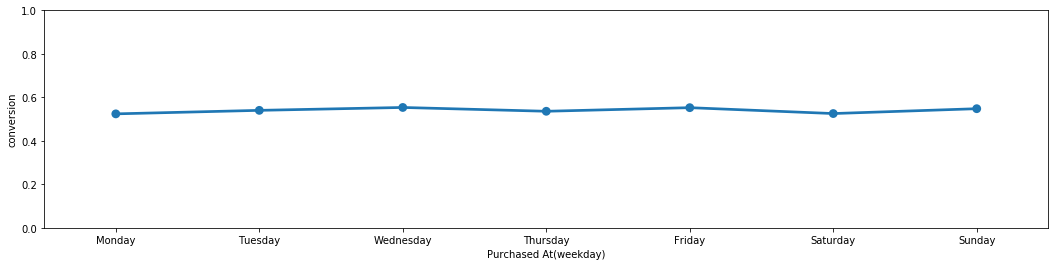

In [60]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

# y축의 최소/최대값을 0/1로 고정합니다.
plt.ylim(0, 1)

sns.pointplot(data=table.reset_index(), x="Purchased At(weekday)", y="conversion", order=weekday_columns, ax=ax)

#### 12. 채널별 결제 / 캔슬 / 환불 비율

In [61]:
data["Channel"].value_counts()

facebook     6880
others       1390
naver        1009
direct        297
email         271
google        120
instagram      33
Name: Channel, dtype: int64

In [63]:
# 피벗테이블로 체널별 결제 / 캔슬 / 환불의 총 인원 수와 비율 표시
table = pd.pivot_table(data, index="Channel", columns="Status", values="Name", fill_value=0, aggfunc=len)
table 

Status,cancelled,completed,refunded
Channel,,,
direct,119,169,9
email,93,155,23
facebook,2812,3654,414
google,42,66,12
instagram,13,17,3
naver,386,568,55
others,545,771,74


In [64]:
# 총 인원수와 전환율 표시
table["total"] = table["completed"] + table["cancelled"] + table["refunded"]
table["conversion"] = table["completed"] / table["total"]

table

Status,cancelled,completed,refunded,total,conversion
Channel,,,,,
direct,119,169,9,297,0.569024
email,93,155,23,271,0.571956
facebook,2812,3654,414,6880,0.531105
google,42,66,12,120,0.550000
instagram,13,17,3,33,0.515152
naver,386,568,55,1009,0.562934
others,545,771,74,1390,0.554676


### 코치 데이터와 매칭

In [65]:
# 먼저 코칭 데이터를 가져와서 coach라는 변수에 할당
coach = pd.read_csv("data/noom/noom_coach.csv", index_col="Access Code")

print(coach.shape)

coach.head()

(10000, 100)


,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),유채우 코치(IW53Y9AW),송지선 코치(WL0877P7),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 13. 기존의 데이터와 코치 데이터를 합쳐치기

In [66]:
data_coach = pd.merge(data, coach, on="Access Code", how='inner')

print(data_coach.shape)

data_coach.head()

(10000, 122)


,Name,Gender,Age,Height,Initial Weight,Lowest Weight,Target Weight,Status,Price,Purchased At,...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,FEMALE,25.0,172.0,66.9,65.8,55.000000,completed,112500,2017-04-14 19:03:29.976,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,허승준,MALE,26.0,176.0,70.0,NaN,65.000000,completed,44780,2017-05-23 20:53:54.368,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,이지민,FEMALE,23.0,171.0,98.0,NaN,91.140000,completed,132000,2017-08-23 23:39:21.840,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,장설윤,FEMALE,20.0,160.0,70.7,NaN,53.000000,completed,112500,2017-08-28 20:18:22.824,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,서성빈,FEMALE,28.0,165.0,55.5,NaN,51.615002,completed,44780,2017-05-07 17:50:30.944,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# 필요한 컬럼만 남기고 나머지는 삭제
names=["Gender", "Age", "Height", "Initial Weight", "Lowest Weight", "Target Weight", "Price", "Purchased At", "Channel",
       "Height(clean)", "Age(clean)","Purchased At(year)", "Purchased At(month)", "Purchased At(day)", 
       "Purchased At(minute)", "Purchased At(second)", "Purchased At(hour)", "Purchased At(weekday)", "Gender(clean)", "Age(Group)"]

data_coach = data_coach.drop(names, axis=1)

data_coach.head()

,Name,Status,정은오 코치(VEV4PGJB),오승혁 코치(VENPKBP9),조소은 코치(D0WASBXN),고영재 코치(C91AVNGB),조수민 코치(OBCAO3W0),강채아 코치(WH2NIKCO),황다훈 코치(1I6IWURH),백슬은 코치(228BFB50),...,오초빈 코치(A3WOLAQM),서수정 코치(F36LORFC),정서율 코치(LX1G7EMD),고우재 코치(SKNL9Z4P),문한규 코치(OU1WVDGA),황세안 코치(3QUBQAVE),홍성은 코치(2I3QJQ5O),고성은 코치(34T7XPYR),백한율 코치(HPWAN8R0),안슬은 코치(QAVWJSZ1)
Access Code,,,,,,,,,,,,,,,,,,,,,
Y9RY2VSI,김승혜,completed,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3GTN3S3B,허승준,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6B0IG276,이지민,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EMGRU2MO,장설윤,completed,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1ELG96TX,서성빈,completed,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 14. 코치별 담당 사용자(total) / 구매 완료 횟수(completed) / 캔슬 횟수(canceled) / 환불 횟수(refunded)

In [79]:
# 피벗테이블로 코치별 구매 / 취소 / 환불 / 횟수 보기
# .T 는 전치
tccr = pd.pivot_table(data_coach, index="Status", aggfunc="sum").T

tccr.head()

Status,cancelled,completed,refunded
강은우 코치(EJIHL7OE),122,171,16
강지희 코치(NOEP7X8B),15,19,1
강채아 코치(WH2NIKCO),9,10,2
고성은 코치(34T7XPYR),24,36,1
고수이 코치(NKHXTMRU),6,5,1


#### 15. 코치별 전환율(conversion rate) / 취소율(cancellation rate)를 계산

In [81]:
tccr["total"] = tccr["completed"] + tccr["cancelled"] + tccr["refunded"]
tccr["conversion rate"] = tccr["completed"] / tccr["total"]
tccr["cancellation rate"] = (tccr["cancelled"] + tccr["refunded"]) / tccr["total"]

tccr.head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
강은우 코치(EJIHL7OE),122,171,16,309,0.553398,0.446602
강지희 코치(NOEP7X8B),15,19,1,35,0.542857,0.457143
강채아 코치(WH2NIKCO),9,10,2,21,0.476190,0.523810
고성은 코치(34T7XPYR),24,36,1,61,0.590164,0.409836
고수이 코치(NKHXTMRU),6,5,1,12,0.416667,0.583333


In [82]:
# 모수가 적은 경우를 배제하기 위해, 최소 100명의 고객을 코칭한 코치만을 대상으로 계산
tccr = tccr[tccr["total"] >= 100]

print(tccr.shape)

tccr.head()

(47, 6)


Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
강은우 코치(EJIHL7OE),122,171,16,309,0.553398,0.446602
고우재 코치(SKNL9Z4P),82,96,11,189,0.507937,0.492063
권슬영 코치(E3GD4106),42,70,9,121,0.578512,0.421488
권시윤 코치(4MEMXAVM),112,149,11,272,0.547794,0.452206
김슬민 코치(CWI0ABRI),120,171,18,309,0.553398,0.446602


In [84]:
# conversion 을 기준으로 가장 결제율이 높은 사람
tccr.sort_values(by="conversion rate", ascending=False).head()

Status,cancelled,completed,refunded,total,conversion rate,cancellation rate
조우찬 코치(WWN531JQ),36,65,6,107,0.607477,0.392523
허슬지 코치(DWVG5IFL),43,71,3,117,0.606838,0.393162
허성원 코치(9124O1IH),43,76,7,126,0.603175,0.396825
조설영 코치(U7L98DAO),48,78,6,132,0.590909,0.409091
권슬영 코치(E3GD4106),42,70,9,121,0.578512,0.421488
